<a href="https://colab.research.google.com/github/JackMAlucard/Data-Scientist-Technical-Assessment/blob/main/ta_fake_real_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📚 Loading all libraries and methods to be used

In [44]:
# To load files from hard drive, the Kaggle API key Credentials
from google.colab import files

# To load files from Google Drive, preprocessed 'clean_dataset.csv'
from google.colab import drive

# To copy files to Colab's local directory
import shutil

# To extract data from zip files
import zipfile

# To interact get directory file names and check files
import os

# For data manipulation, numerical operations, and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For regular text preprocessing techniques
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# For data visualization specific to text data
from wordcloud import WordCloud

#For TF-IDF Vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

#For Word Embeddings
from gensim.models import KeyedVectors

#For implementation of Deep Neural Network
from keras.layers import Input, Dense, concatenate
from keras.models import Model
from keras.optimizers import Adam

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#1️⃣ Data Cleaning and Preprocessing

##💾 Loading the text dataset and inspecting its structure

###Setting up the Kaggle API to import the datasets directly from Kaggle

In [14]:
# Upload Kaggle API Credentials, downloaded from https://www.kaggle.com/settings
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jackmalucard","key":"2aa4618ce05c77e80b6f52fc895aa216"}'}

In [2]:
# Move Kaggle API Credentials
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
# Set Permissions
!chmod 600 ~/.kaggle/kaggle.json

###Downloading dataset from Kaggle

In [3]:
# Download dataset directly using the Kaggle API
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset/
!ls

 98% 40.0M/41.0M [00:03<00:00, 19.8MB/s]
100% 41.0M/41.0M [00:03<00:00, 13.1MB/s]
fake-and-real-news-dataset.zip	sample_data


###Extracting dataset from zip file into the ```/content``` directory.

In [4]:
# Specify the path to the zip file with the dataset
zip_file_path = 'fake-and-real-news-dataset.zip'

# Specify the directory where the files are to be extracted
extract_dir = '/content'

# Extract the files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

!ls

fake-and-real-news-dataset.zip	Fake.csv  sample_data  True.csv


Getting the dataset file names. They will be used when loading data into dataframes

In [5]:
# Specify the directory path
directory_path = '/content'

# Specify the desired file extension
extension = '.csv'

# Get a list of file names in the directory
file_names = os.listdir(directory_path)

# Filter and save filenames with the desired extension
filtered_files = [file_name for file_name in file_names if file_name.endswith(extension)]

# Print the list of file names
print("List of file names in the directory:")
for file_name in filtered_files:
    print(file_name)

List of file names in the directory:
Fake.csv
True.csv


###Loading and inspecting data

In [7]:
# Load the dataset files into Pandas DataFrames
df1 = pd.read_csv(filtered_files[0]) # Fake News
df2 = pd.read_csv(filtered_files[1]) # Real News

In [8]:
# Fake News Dataset (df1)
# Get basic information about df1
print("Fake News dataframe info:")
print(df1.info())
print("\n")

# Display the first few rows of df1
print("First few rows of Fake News DataFrame:")
print(df1.head())

Fake News dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


First few rows of Fake News DataFrame:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was reveal

In [9]:
# Real News Dataset (df2)
# Get basic information about df2
print("Real News dataframe info:")
print(df2.info())
print("\n")

# Display the first few rows of df2
print("First few rows of Real News DataFrame:")
print(df2.head())

Real News dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


First few rows of Real News DataFrame:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHIN

###Observations on the datasets' structure

After loading the two datasets into dataframes, and inspecting them by printing their basic properties and first few rows, it can be determined that the datasets consist of:
- 4 data columns containing the following information for each news article:
  1. title
  2. text
  3. subject
  4. date
- The columns contain text data

Thus far, it could be said that the most relevant text information that can be used to classify each news article would be contained in the 'title' and 'text' columns.

The Kaggle page for this data set indicates that 68% of the subjects in the 'subject' column for the Fake News set is made up of the generic 'News' and 'Politics' subjects, while the Real News set is entirely made up of the subjects 'politicsNews' and 'worldNews'.

On the other hand, the time frame for the Fake News set is from 30-Mar-15 to 18-Feb-18, while for the Real News set it is from 12-Jan-16 to 30-Dec-17.

The ```info``` method of the pandas library indicates that there are no missing values on either set. The Kaggle page however indicates that 3% of the data from the Fake News set is empty.

##🚫 Handling missing values in text data

Considering the information from the Kaggle page that there are a number of empty text rows on the datasets, this is checked in order to drop them from the dataframes.

In [10]:
# Iterate through the column dataframes, and then through the 'title' and 'text'
# columns to count how many have empty space values
for dataframe in (df1, df2):
  for column in ('title', 'text'):
    empty_space_count = 0
    for value in dataframe[column]:
      if value.isspace(): empty_space_count += 1
    print(f"Number of values filled with empty spaces in: {empty_space_count}")

Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 630
Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 1


The previous code block indicates that, as a whole, there are several empty text rows in the 'text' columns. These rows are dropped before moving on to text preprocessing.

In [11]:
# Drop rows with strings filled with empty spaces (whitespace)
df1 = df1[df1.applymap(lambda x: not isinstance(x, str) or x.strip() != '').all(axis=1)]
df2 = df2[df2.applymap(lambda x: not isinstance(x, str) or x.strip() != '').all(axis=1)]

# Print new dataframes info and check for empty spaces again
for dataframe in (df1, df2):
  print(dataframe.info())
  for column in ('title', 'text'):
    empty_space_count = 0
    for value in dataframe[column]:
      if value.isspace(): empty_space_count += 1
    print(f"Number of values filled with empty spaces in: {empty_space_count}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22851 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    22851 non-null  object
 1   text     22851 non-null  object
 2   subject  22851 non-null  object
 3   date     22851 non-null  object
dtypes: object(4)
memory usage: 892.6+ KB
None
Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21416 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 836.6+ KB
None
Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 0


##🔄 Perform text preprocessing steps

Before performing text preprocessing as a whole, the two sets will be unified into a single dataset with the following columns: 'title', 'text', 'category' ('Fake' or 'Real'), 'label' (0 Fake, 1 Real). With the added 'category' and 'label' columns, a first step in the preprocessing task, Encoding Categorical Labels, is already achieved.

The 'subject' column has been dropped with the working assumption that due to the apparent uniformity in the subjects, these categorization of the news will not be significantly relevant to the current classification task.

The 'date' column has been dropped since, even though it could also aid in news classification by pattern seeking in the distribution of the dates, it is not relevant for classification at an NLP level.

###Merging datasets, dropping 'subject' and 'date' columns, adding 'category' and 'label' column

In [12]:
# Merge the DataFrames, selecting specific columns
df = pd.concat([df1[['title', 'text']], df2[['title', 'text']]])

# Add new columns to indicate the news type ('Fake', 0 from df1, 'Real', 1 from df2)
df['category'] = ['Fake'] * len(df1) + ['Real'] * len(df2)
df['label'] = [0] * len(df1) + [1] * len(df2)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Printing new merged dataframe info
print(df.info())
print('\n')

# Change data type of 'label' column from int64 to int32
df['label'] = df['label'].astype('int32')

# Randomly reorder the rows
df = df.sample(frac=1, random_state=46).reset_index(drop=True)
# Printing new merged dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44267 non-null  object
 1   text      44267 non-null  object
 2   category  44267 non-null  object
 3   label     44267 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44267 non-null  object
 1   text      44267 non-null  object
 2   category  44267 non-null  object
 3   label     44267 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 1.2+ MB
None


###Applying basic preprocessing techniques

Defining preprocessing techniques

In [14]:
# Basic preprocessing techniques
def text_preprocessing(text):
    # Lowercase the text
    text = text.lower()

    # Remove leading/trailing whitespaces
    text = text.strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and stop words
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Rejoin the tokens into a cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

Applying basic preprocessing

In [15]:
# Apply text preprocessing to dataset
df['clean_text'] = df['text'].apply(text_preprocessing)

##✨ Provide a clean, preprocessed text dataset with extensive documentation

The clean processed dataset consists of the following 5 columns of data:
- 'title': News article title (string object)
- 'text': News article text (string object)
- 'category': A string indicating whether the article is 'Real' or 'Fake' (string object)
- 'label': A numeric label indicating whether the article is Real (1) or Fake (0) (integer)
- 'clean_text': Preprocessed text tokens joined in a single string with spaces ' '. The preprocessing steps included lowercasing, removing leading/trailing whitespaces, removing punctuation and stop words.

There are no rows of data which are empty.

The rows of data have been randomly reordered from the original dataset so that fake and real news are not grouped in the final dataset.

In [8]:
print(df.info())
print(df.head())
#print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44267 non-null  object
 1   text        44267 non-null  object
 2   category    44267 non-null  object
 3   label       44267 non-null  int64 
 4   clean_text  44266 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                               title  \
0  FULL SPEECH: Donald Trump Speaks to 20,000 PLU...   
1  HILLARY’S ANTI-TRUMP MUSLIM DAD Claims Terror ...   
2  OAS says Honduran presidential election should...   
3  Exclusive: Displaced Rohingya in camps face ai...   
4  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   

                                                text category  label  \
0  Donald Trump is doing exactly the opposite of ...     Fake      0   
1  We ve inserted our thoughts and a few tweets t...     Fake      0   
2  T

###⚠️ Observation
Preprocessing took about half an hour, which is why it may be desirable to use an already prepared CSV file with a clean preprocessed dataset instead of running all the previous cells from scratch. The next code cell allows a  preprocessed DataFrame to be saved to a CSV file.

In [21]:
# Save the DataFrame to a CSV file
# Exclude the DataFrame index from the CSV (index=False)
df.to_csv('clean_dataset.csv', index=False)

#2️⃣ Text Analysis and Feature Extraction

###⚠️ Upload clean_dataset.csv (allows to skip 1️⃣ Data Cleaning and Preprocessing)

Copy 'clean_dataset.zip' from Google Drive to Colab's local directory. The file used in this notebook can be downloaded from: [clean_dataset.zip](https://drive.google.com/file/d/1kFD_Tet0bJkJsfeXD_NPcWrYcdie1fRN/view?usp=sharing)

In [15]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the file in your Google Drive
folder = 'Technical Assessment - DS' # Replace with corresponding Google Drive Folder
file_path = '/content/drive/My Drive/' + folder + '/clean_dataset.zip'

# Copy the file to Colab's local directory
shutil.copy(file_path, '/content')

# Verify that the file has been copied
os.listdir('/content')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['.config',
 'kaggle.json',
 'clean_dataset.csv',
 'clean_dataset.zip',
 'drive',
 'sample_data']

Extract 'clean_dataset.csv' from zip file

In [16]:
# Specify the path to the zip file with the dataset
zip_file_path = 'clean_dataset.zip'

# Specify the directory where the files are to be extracted
extract_dir = '/content'

# Extract the files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

!ls

clean_dataset.csv  clean_dataset.zip  drive  kaggle.json  sample_data


Load 'clean_dataset.csv' to DataFrame and inspect it

In [17]:
# Load the dataset files into Pandas DataFrames
df = pd.read_csv('clean_dataset.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44267 non-null  object
 1   text        44267 non-null  object
 2   category    44267 non-null  object
 3   label       44267 non-null  int64 
 4   clean_text  44266 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                               title  \
0  FULL SPEECH: Donald Trump Speaks to 20,000 PLU...   
1  HILLARY’S ANTI-TRUMP MUSLIM DAD Claims Terror ...   
2  OAS says Honduran presidential election should...   
3  Exclusive: Displaced Rohingya in camps face ai...   
4  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   

                                                text category  label  \
0  Donald Trump is doing exactly the opposite of ...     Fake      0   
1  We ve inserted our thoughts and a few tweets t...     Fake      0   
2  T

###🚫 Checking for possible 'None' values in the 'clean_text' column

In [30]:
# Count the number of 'None' values in the 'clean_text' column
num_none_values = df['clean_text'].isna().sum()

# Print the count
print(f'Number of "None" values in the clean_text column: {num_none_values}')

Number of "None" values in the clean_text column: 0


Dropping rows with 'None' values, if any

In [31]:
# Drop rows with 'None' values in the 'clean_text' column
df.dropna(subset=['clean_text'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44266 entries, 0 to 44265
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44266 non-null  object
 1   text        44266 non-null  object
 2   category    44266 non-null  object
 3   label       44266 non-null  int64 
 4   clean_text  44266 non-null  object
 5   num_tokens  44266 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.0+ MB
None


##📝 Conduct text analysis to gain insights from the text data

###Histogram comparing the number of tokens of Real and Fake news

In [19]:
# Tokenize the 'clean_text' column and count the number of tokens
df['num_tokens'] = df['clean_text'].apply(lambda x: len(word_tokenize(x)))

# Separate data for 'Real' and 'Fake' categories
real_tokens = df[df['category'] == 'Real']['num_tokens']
fake_tokens = df[df['category'] == 'Fake']['num_tokens']

Plotting histogram

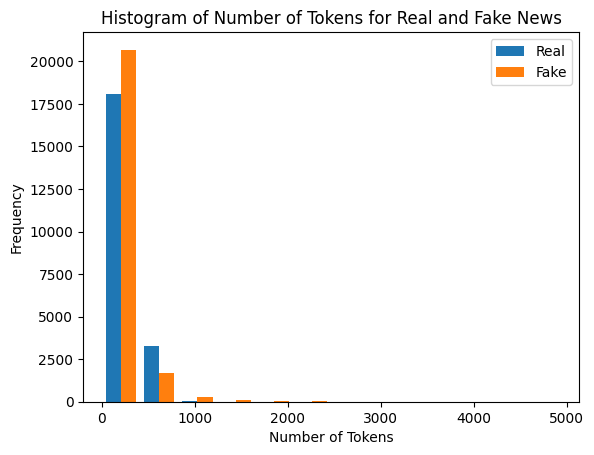

In [7]:
# Create a histogram for 'Real' and 'Fake' tokens
plt.hist([real_tokens, fake_tokens], bins=12, alpha=1, label=['Real', 'Fake'])
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Tokens for Real and Fake News')
plt.legend()
plt.show()

Seeing as how the data is more dense on the lower values for the number of tokens, the histogram is redrawn reducing the range for this value

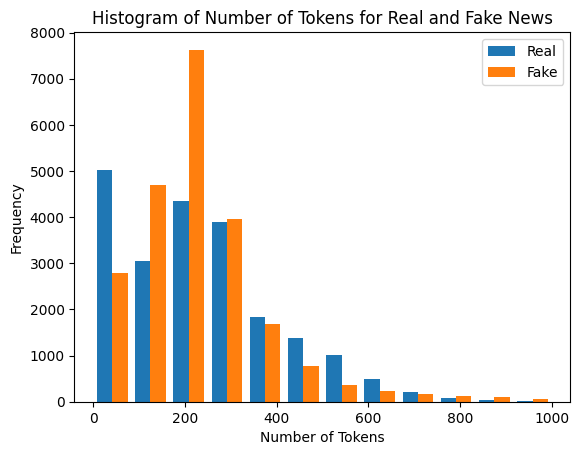

In [8]:
# Set a specific range for the x-axis to focus on lower, more significant values
x_range = (0, 1000)

# Create a histogram for 'Real' and 'Fake' tokens
plt.hist([real_tokens, fake_tokens], bins=12, range=x_range, alpha=1, label=['Real', 'Fake'])
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Tokens for Real and Fake News')
plt.legend()
plt.show()

###🔎 Insight

There is a noticeable difference in the distribution of the number of tokens between Fake and Real news for the lower values of this number.

###Frequency distribution plots

In [9]:
# Tokenize and flatten the 'clean_text' column to create a list of all tokens
all_tokens = [token for text in df['clean_text'] for token in nltk.word_tokenize(text)]

# Create frequency distributions for 'Real' and 'Fake' news
real_tokens = [token for text in df[df['category'] == 'Real']['clean_text'] for token in nltk.word_tokenize(text)]
fake_tokens = [token for text in df[df['category'] == 'Fake']['clean_text'] for token in nltk.word_tokenize(text)]

real_freq_dist = FreqDist(real_tokens)
fake_freq_dist = FreqDist(fake_tokens)

###Top words frequencies for Real News

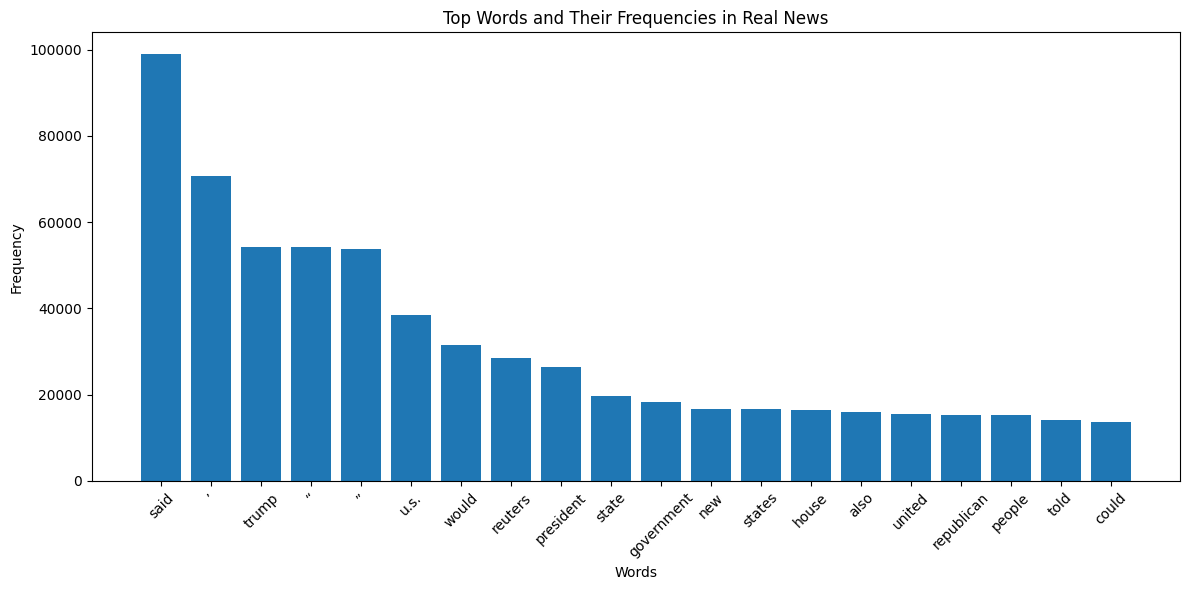

In [10]:
# Set the number of top words to display in the plot
num_top_words = 20

# Get the top words and their frequencies from 'real_freq_dist'
top_words_real = real_freq_dist.most_common(num_top_words)

# Extract the top words and frequencies into separate lists
top_words_real, top_word_frequencies_real = zip(*top_words_real)

# Generate a bar plot for the top words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words_real, top_word_frequencies_real)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies in Real News')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From this plot, I can see that some of the top words here are just special characters, as well as the word 'reuters' which is just the a name of a news agency, most likely from where the real news were obtained.

These words will be dropped from the tokens in the column 'clean_text'

In [11]:
# Save words to be removed to a list
words_to_remove = [top_words_real[1], top_words_real[3], top_words_real[4], top_words_real[7]]
print('Words to be removed:', words_to_remove)

# Function to remove specific words
def remove_words(text, words_to_remove):
    tokens = text.split()  # Split the text into tokens
    cleaned_tokens = [word for word in tokens if word not in words_to_remove]
    return ' '.join(cleaned_tokens)  # Join the cleaned tokens back into text

# Apply the remove_words function to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(lambda text: remove_words(text, words_to_remove))

Words to be removed: ['’', '“', '”', 'reuters']


The code blocks preceeding the Real News frequency histogram are repeated in order to plot the histogram again

In [12]:
# Tokenize and flatten the 'clean_text' column to create a list of all tokens
all_tokens = [token for text in df['clean_text'] for token in nltk.word_tokenize(text)]

# Create frequency distributions for 'Real' and 'Fake' news
real_tokens = [token for text in df[df['category'] == 'Real']['clean_text'] for token in nltk.word_tokenize(text)]
fake_tokens = [token for text in df[df['category'] == 'Fake']['clean_text'] for token in nltk.word_tokenize(text)]

real_freq_dist = FreqDist(real_tokens)
fake_freq_dist = FreqDist(fake_tokens)

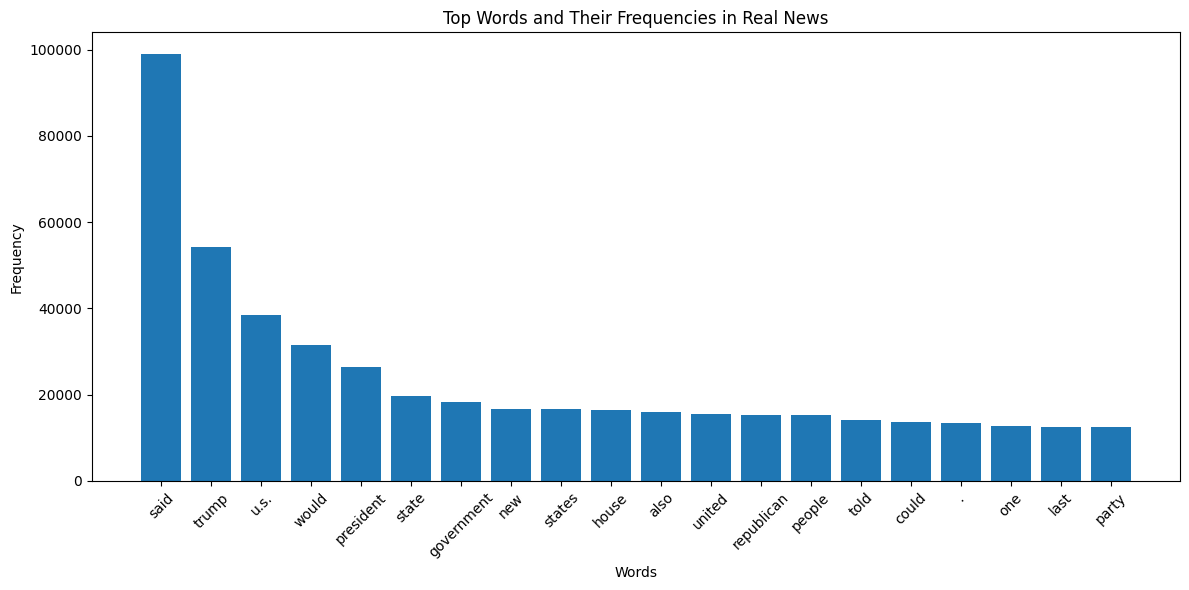

In [20]:
# Set the number of top words to display in the plot
num_top_words = 20

# Get the top words and their frequencies from 'real_freq_dist'
top_words_real = real_freq_dist.most_common(num_top_words)

# Extract the top words and frequencies into separate lists
top_words_real, top_word_frequencies_real = zip(*top_words_real)

# Generate a bar plot for the top words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words_real, top_word_frequencies_real)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies in Real News')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

There is still a special character in the top words, but it won't be eliminated this time since it is just the one.

###Top words frequencies for Fake News

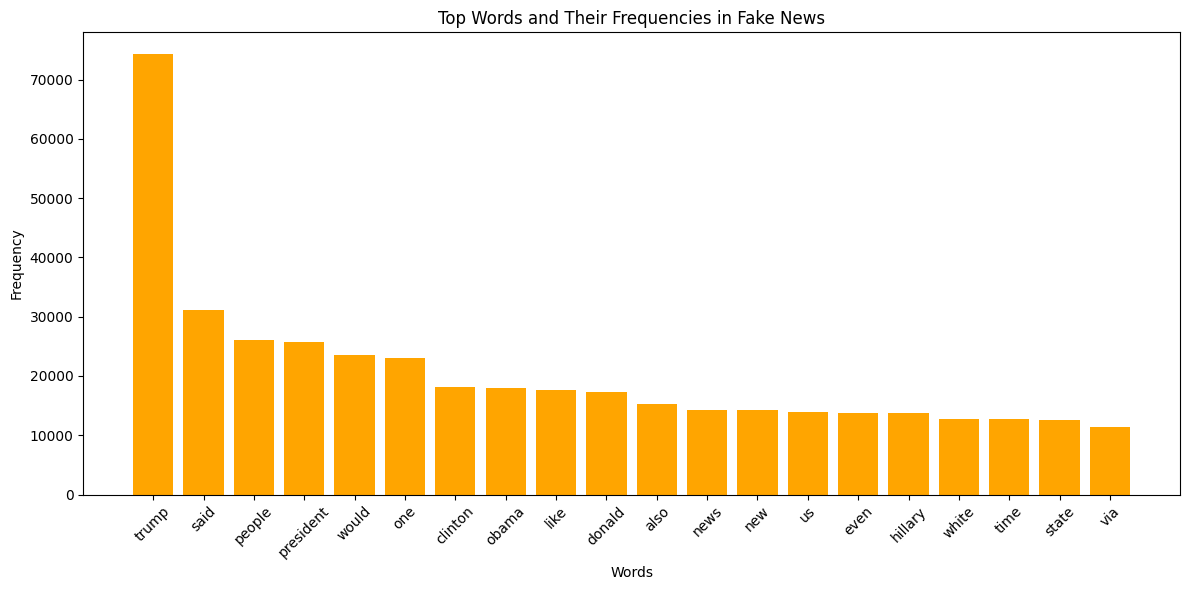

In [21]:
# Set the number of top words to display in the plot
num_top_words = 20

# Get the top words and their frequencies from 'real_freq_dist'
top_words_fake = fake_freq_dist.most_common(num_top_words)

# Extract the top words and frequencies into separate lists
top_words_fake, top_word_frequencies_fake = zip(*top_words_fake)

# Generate a bar plot for the top words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words_fake, top_word_frequencies_fake, color='orange')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies in Fake News')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

###🔎 Insight

A stark difference can also be seen between the top words frequencies for both datasets.

The Fake news data set features the word 'trump' prominently in such a manner that the frequency for the next top word, 'said' drops considerably and then it only drops gradually for the next top words.

The Real news dataset share the same two top words, but in inverse places. The drop in frequency for the top words is also smoother than in the case for the Fake news dataset, as previously exemplified.

###Number of unique terms

The number of unique terms is of interest in the case of limiting the number of features to be considered for the feature extraction step next.

In [22]:
# Initialize the set to store unique terms
unique_terms = set()

# Tokenize and find unique terms
for text in df['clean_text']:
    words = nltk.word_tokenize(text)
    unique_terms.update(words)

# Get the number of unique terms
num_unique_terms = len(unique_terms)

print(f'Number of unique terms in the dataset: {num_unique_terms}')

Number of unique terms in the dataset: 221661


##📊 Visualize and explore text data patterns using advanced NLP visualization

###Word Clouds

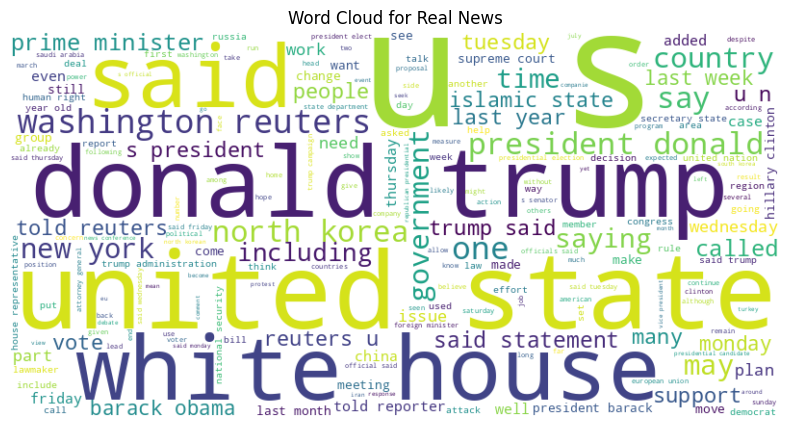

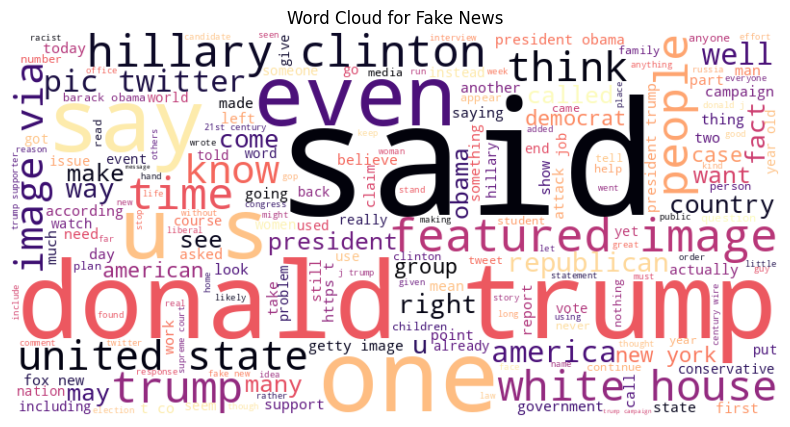

In [26]:
# Filter data by category
categories = ['Real', 'Fake']

# Define different colormaps for word clouds
colormaps = ['viridis', 'magma']

for i, category in enumerate(categories):
  category_data = df[df['category'] == category]

  # Combine text from the category into a single string
  category_text = ' '.join(category_data['clean_text'])

  # Create a WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormaps[i]).generate(category_text)

  # Plot the WordCloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Word Cloud for {category} News')
  plt.axis('off')  # Turn off axis labels
  plt.show()

  print()

###🔎 Insight

One notable differentiating feature between each type of news that can be observed on the wordclouds is the fact that, at least in these datasets, Fake news prominently feature mentions of 'images', 'pic', and 'twitter', whereas Real news do not.

##🛰️ Extract advanced features from text data

###TF-IDF Vectorization

In [27]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Using a limited maximum of unique terms

# Fit and transform the vectorizer on the training data
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])

###Word Embeddings

Using the pre-trained "word2vec-news-300d-1M" model to convert text into word embeddings

In [28]:
# Downloading fasttext word vectors
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip
!ls

--2023-10-10 14:16:12--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.155.173.79, 18.155.173.116, 18.155.173.80, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.155.173.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  55.1MB/s    in 10s     

2023-10-10 14:16:22 (64.0 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   
clean_dataset.csv  kaggle.json		  wiki-news-300d-1M.vec.zip
clean_dataset.zip  sample_data
drive		   wiki-news-300d-1M.vec


⚠️ Loading the 'wiki-news-300d-1M.vec' file with the pre-trained model takes about 4 minutes.

In [29]:
# Load the pre-trained model
# Replace 'path/to/word2vec-news-300d-1M.vec' with the actual path to the downloaded model file
word2vec_model = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)

In [32]:
# Function to convert text into embeddings (averaging word vectors)
def text_to_embeddings(text, model):
    words = nltk.word_tokenize(text)
    embeddings = [model.get_vector(word) for word in words if word in model.key_to_index]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zeros for empty text

# Convert text data to Word2Vec word embeddings using the loaded model
word2vec_embeddings = np.array([text_to_embeddings(text, word2vec_model) for text in df['clean_text']])

#3️⃣ Predictive Modeling with NLP

##✂️ Split the text dataset into training, validation, and testing sets

In [34]:
# Split the dataset into training and temporary dataset
x_train_tfidf, x_temp_tfidf, x_train_word2vec, x_temp_word2vec, y_train, y_temp = train_test_split(
    tfidf_features, word2vec_embeddings, df['label'], test_size=0.4, random_state=42
)

# Split the temporary dataset into validation and testing sets
x_valid_tfidf, x_test_tfidf, x_valid_word2vec, x_test_word2vec, y_valid, y_test = train_test_split(
    x_temp_tfidf, x_temp_word2vec, y_temp, test_size=0.5, random_state=42
)

##🤖 Choose and implement an NLP model to handle the text data

###Deep Neural Network (DNN)

In [35]:
# Define input layers for TF-IDF and Word Embeddings
input_tfidf = Input(shape=(x_train_tfidf.shape[1],))
input_word2vec = Input(shape=(x_train_word2vec.shape[1],))

# Define Dense layers for each input
dense_tfidf = Dense(128, activation='relu')(input_tfidf)
dense_word2vec = Dense(128, activation='relu')(input_word2vec)

# Concatenate the two sets of dense layers
concatenated = concatenate([dense_tfidf, dense_word2vec], axis=-1)

# Additional layers and output for binary classification
hidden_layer = Dense(64, activation='relu')(concatenated)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

# Create the combined model
model = Model(inputs=[input_tfidf, input_word2vec], outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

##🏋️ Train the model on the training set

In [36]:
# Train the model using the training and validation data
history = model.fit(
    [x_train_tfidf.toarray(), x_train_word2vec],
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=([x_valid_tfidf.toarray(), x_valid_word2vec], y_valid)
)

Epoch 1/10
830/830 [==============================] - 12s 8ms/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0133 - val_accuracy: 0.9954
Epoch 2/10
830/830 [==============================] - 6s 8ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0128 - val_accuracy: 0.9949
Epoch 3/10
830/830 [==============================] - 4s 5ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0114 - val_accuracy: 0.9960
Epoch 4/10
830/830 [==============================] - 5s 6ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0110 - val_accuracy: 0.9966
Epoch 5/10
830/830 [==============================] - 6s 7ms/step - loss: 0.0038 - accuracy: 0.9986 - val_loss: 0.0159 - val_accuracy: 0.9956
Epoch 6/10
830/830 [==============================] - 4s 5ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0164 - val_accuracy: 0.9949
Epoch 7/10
830/830 [==============================] - 4s 5ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0177 - val_accuracy: 0.9957
Epoch

###Loss and accuracy analysis for training and validation sets

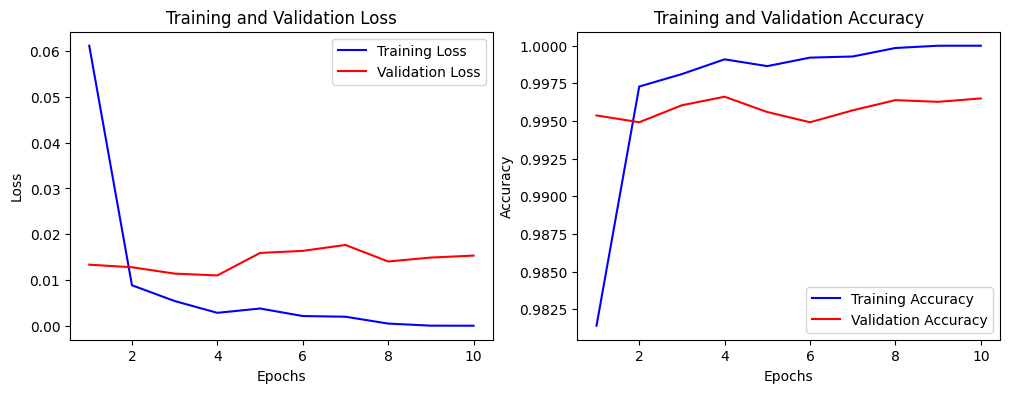

In [37]:
# Access the training and validation metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

These results indicate overfitting, this first attempt at a model overspecializes on the training data which means that a certain strategy needs to be applied in order to address this issue.

###Attempting to improve the model: Using only word embeddings, dropping TF-IDF features

Given the fact that the text analysis revealed that the two datasets were notably different in certain ways, perhaps it would be best to just use the word embeddings to try and emphasize the semantic relationships of the data drawn from the news pre-trained model used to obtain the word embeddings.

In [41]:
# Define input layers only for Word Embeddings
input_word2vec = Input(shape=(x_train_word2vec.shape[1],))

# Define Dense layers for embeddings input
dense_word2vec = Dense(128, activation='relu')(input_word2vec)

# Additional layers and output for binary classification
hidden_layer = Dense(64, activation='relu')(input_word2vec)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

# Create the combined model
model = Model(input_word2vec, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the training data
#history = model.fit(x_train_word2vec, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Train the model using the training and validation data
history = model.fit(
    x_train_word2vec,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_valid_word2vec, y_valid)
)

Epoch 1/10
830/830 [==============================] - 3s 3ms/step - loss: 0.2126 - accuracy: 0.9435 - val_loss: 0.0854 - val_accuracy: 0.9745
Epoch 2/10
830/830 [==============================] - 3s 3ms/step - loss: 0.0715 - accuracy: 0.9768 - val_loss: 0.0588 - val_accuracy: 0.9805
Epoch 3/10
830/830 [==============================] - 3s 3ms/step - loss: 0.0557 - accuracy: 0.9814 - val_loss: 0.0507 - val_accuracy: 0.9832
Epoch 4/10
830/830 [==============================] - 2s 3ms/step - loss: 0.0479 - accuracy: 0.9842 - val_loss: 0.0481 - val_accuracy: 0.9825
Epoch 5/10
830/830 [==============================] - 2s 3ms/step - loss: 0.0443 - accuracy: 0.9852 - val_loss: 0.0471 - val_accuracy: 0.9823
Epoch 6/10
830/830 [==============================] - 2s 2ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0443 - val_accuracy: 0.9838
Epoch 7/10
830/830 [==============================] - 2s 3ms/step - loss: 0.0397 - accuracy: 0.9862 - val_loss: 0.0435 - val_accuracy: 0.9852
Epoch 

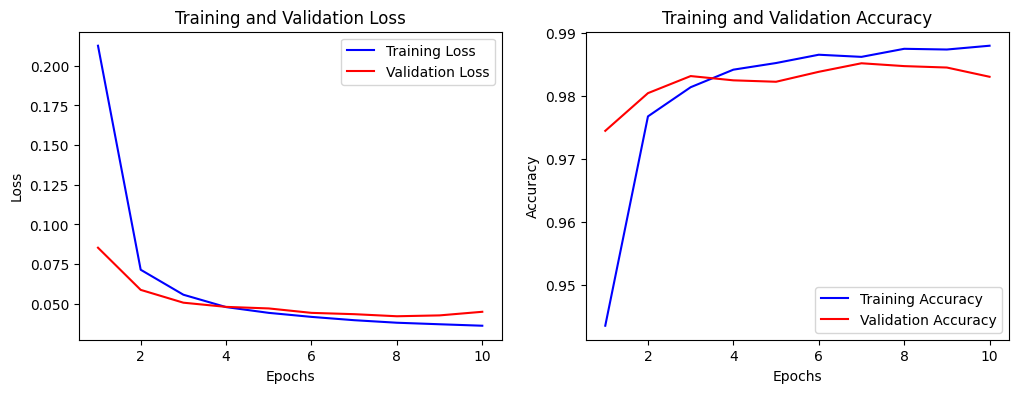

In [42]:
# Access the training and validation metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_word2vec, y_test)

# Print the test loss and test accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

277/277 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9875
Test Loss: 0.0360
Test Accuracy: 0.9875


##📝 Evaluate the model on the **testing** set

###Confusion Matrix

277/277 [==============================] - 1s 3ms/step


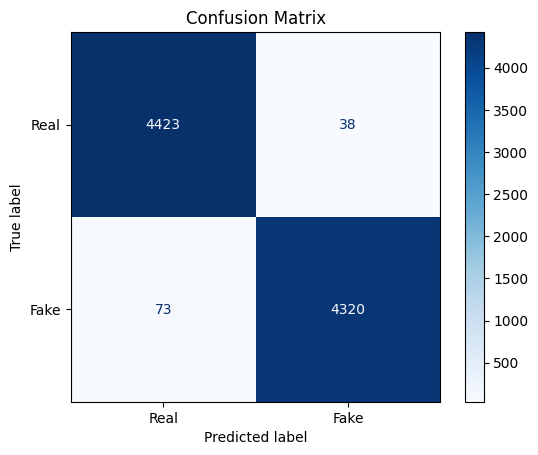

In [48]:
# Predictions on the test data
y_pred = model.predict(x_test_word2vec)

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Real', 'Fake'])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()